In [10]:
import pandas as pd 
import numpy as np 

In [11]:
algeria_df = pd.read_csv("algerian_df.csv",header =None)
algeria_df['Year']=pd.RangeIndex(start =1960,stop=(1960+len(algeria_df)))
index = algeria_df.set_index('Year',inplace=True)
algeria_df.columns=['Export']
algeria_df.head()

,Export
Year,
1960,39.043173
1961,46.244557
1962,19.793873
1963,24.684682
1964,25.084059


In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

In [13]:
algeria_export = algeria_df['Export']
train_data = algeria_export.iloc[:45]
test_data = algeria_export.iloc[45:]

In [14]:
ses_model = SimpleExpSmoothing(train_data).fit()
forecast_values = ses_model.forecast(len(test_data))
fit_model = SimpleExpSmoothing(test_data).fit(smoothing_level=0.1)
forecast_values_index = ses_model.fittedvalues

C:\Users\Student\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Student\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Student\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Student\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Student\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: 

In [15]:
# data=algeria_export.tolist()
# algeria_data = pd.Series(data, index)
# 
# fit_1=SimpleExpSmoothing(algeria_data, initialization_method="heuristic").fit(smoothing_level=0.1, optimized= False)

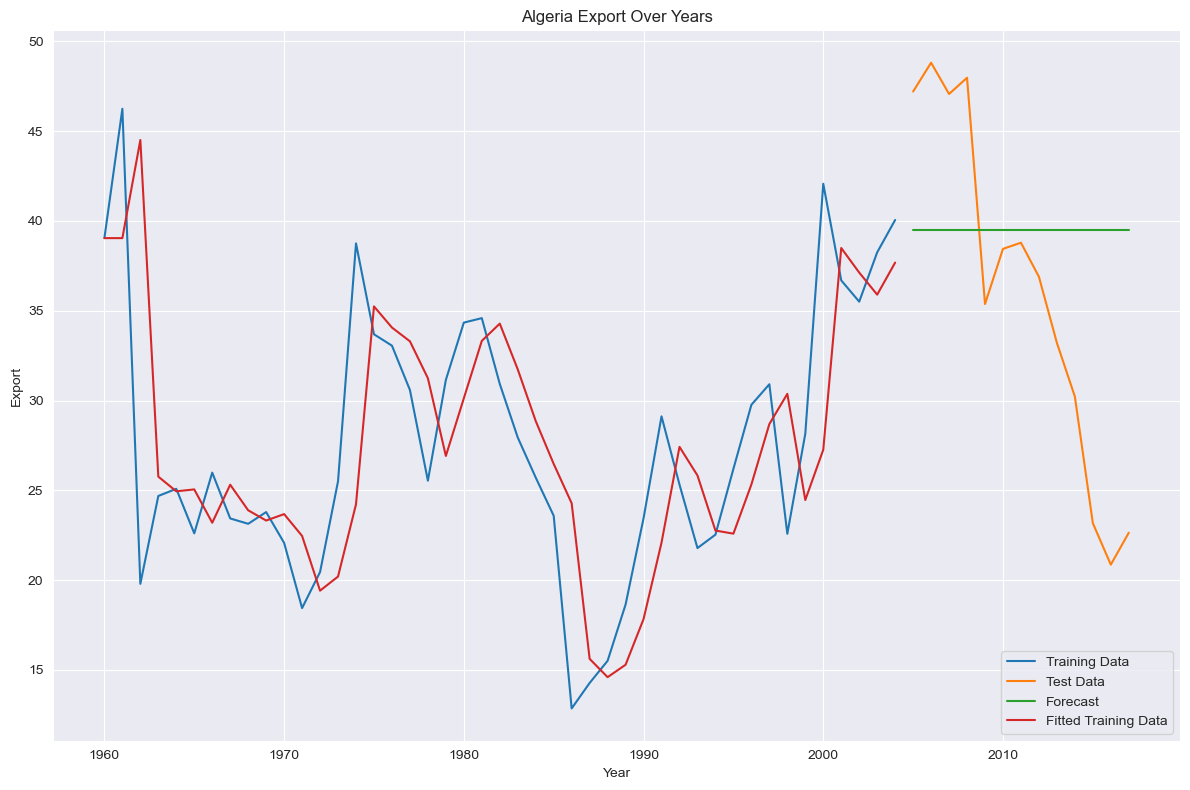

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast_values, label='Forecast')
plt.plot(train_data.index, forecast_values_index, label='Fitted Training Data')

plt.title('Algeria Export Over Years')
plt.xlabel('Year')
plt.ylabel('Export')

plt.legend(loc = 'lower right')

plt.grid(True)
plt.tight_layout()
plt.show()
